In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_cleaned_data_set.csv')
df.head()
df.shape

(118981, 31)

### Feature Encoding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118981 entries, 0 to 118980
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118981 non-null  object 
 1   is_canceled                     118981 non-null  int64  
 2   lead_time                       118981 non-null  int64  
 3   arrival_date_year               118981 non-null  int64  
 4   arrival_date_month              118981 non-null  object 
 5   arrival_date_week_number        118981 non-null  int64  
 6   arrival_date_day_of_month       118981 non-null  int64  
 7   meal                            118981 non-null  object 
 8   country                         118981 non-null  object 
 9   market_segment                  118981 non-null  object 
 10  distribution_channel            118981 non-null  object 
 11  is_repeated_guest               118981 non-null  int64  
 12  previous_cancell

In [4]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  15


In [5]:
for feature in cat_feature:
    print("{} : {} labels ".format(feature,len(df[feature].unique())))

hotel : 2 labels 
arrival_date_month : 12 labels 
meal : 4 labels 
country : 178 labels 
market_segment : 7 labels 
distribution_channel : 5 labels 
reserved_room_type : 9 labels 
assigned_room_type : 11 labels 
deposit_type : 3 labels 
agent : 334 labels 
company : 349 labels 
customer_type : 4 labels 
reservation_status : 3 labels 
reservation_status_date : 926 labels 
arrival_date_full : 793 labels 


The agent and company IDs recorded in the agent and company features include a large amount of categorical data that is de-identified and therefore difficult to interpret. Since information about the type of agent and company used is included in the market_segment and distribution_channel features, the agent and company features were not included in the model.

In [6]:
df=df.drop(columns=["agent","company"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118981 entries, 0 to 118980
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118981 non-null  object 
 1   is_canceled                     118981 non-null  int64  
 2   lead_time                       118981 non-null  int64  
 3   arrival_date_year               118981 non-null  int64  
 4   arrival_date_month              118981 non-null  object 
 5   arrival_date_week_number        118981 non-null  int64  
 6   arrival_date_day_of_month       118981 non-null  int64  
 7   meal                            118981 non-null  object 
 8   country                         118981 non-null  object 
 9   market_segment                  118981 non-null  object 
 10  distribution_channel            118981 non-null  object 
 11  is_repeated_guest               118981 non-null  int64  
 12  previous_cancell

In [7]:
#Applying label encoding for categorical features to find the correlation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1=df.copy()
df1['hotel'] = le.fit_transform(df1['hotel'])
df1['arrival_date_month'] = le.fit_transform(df1['arrival_date_month'])
df1['meal'] = le.fit_transform(df1['meal'])
df1['country'] = le.fit_transform(df1['country'])
df1['market_segment'] = le.fit_transform(df1['market_segment'])
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'])
df1['reserved_room_type'] = le.fit_transform(df1['reserved_room_type'])
df1['assigned_room_type']= le.fit_transform(df1['assigned_room_type'])
df1['deposit_type'] = le.fit_transform(df1['deposit_type'])
df1['customer_type'] = le.fit_transform(df1['customer_type'])
df1['reservation_status'] = le.fit_transform(df1['reservation_status'])
df1['reservation_status_date'] = le.fit_transform(df1['reservation_status_date'])
df1['arrival_date_full']=le.fit_transform(df1['arrival_date_full'])

In [8]:
cor=df1.corr()

<AxesSubplot:>

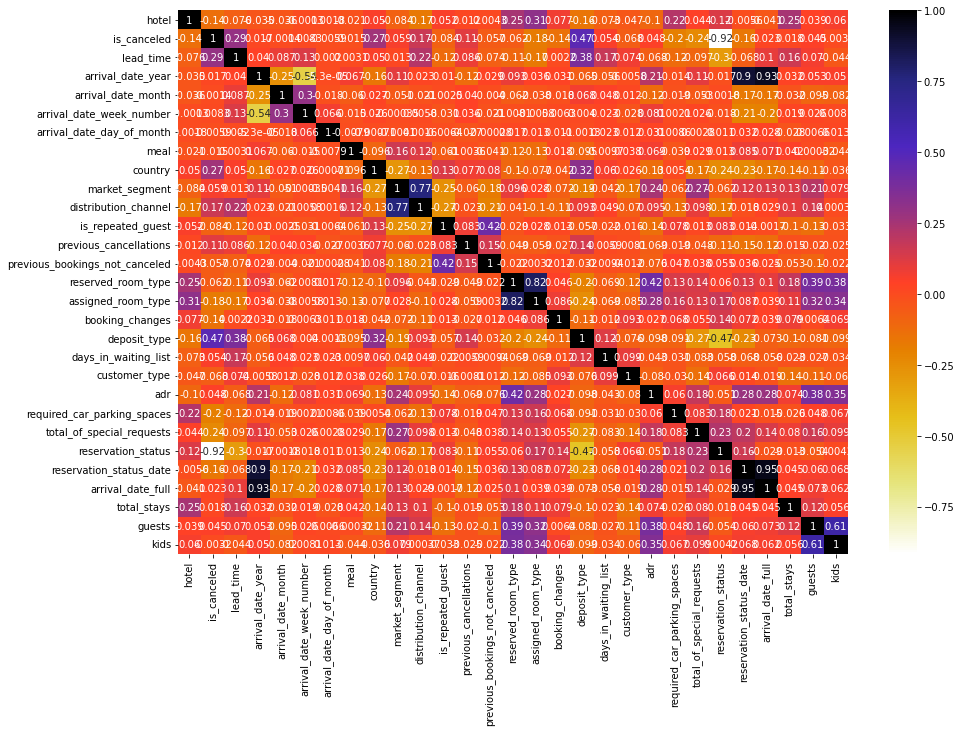

In [9]:
plt.figure(figsize = (15,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [10]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(df1, 0.8)
corr_features

{'arrival_date_full',
 'assigned_room_type',
 'reservation_status',
 'reservation_status_date'}

We will remove those co related features, and some other attributes 

In [12]:
df = df.drop(columns = ['hotel','country', 'reservation_status_date','assigned_room_type','reservation_status','arrival_date_full','arrival_date_year','arrival_date_week_number'], axis=1)
df1 = df1.drop(columns = ['hotel','country', 'reservation_status_date','assigned_room_type','reservation_status','arrival_date_full','arrival_date_year','arrival_date_week_number'], axis=1)


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118981 entries, 0 to 118980
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118981 non-null  int64  
 1   lead_time                       118981 non-null  int64  
 2   arrival_date_month              118981 non-null  int64  
 3   arrival_date_day_of_month       118981 non-null  int64  
 4   meal                            118981 non-null  int64  
 5   market_segment                  118981 non-null  int64  
 6   distribution_channel            118981 non-null  int64  
 7   is_repeated_guest               118981 non-null  int64  
 8   previous_cancellations          118981 non-null  int64  
 9   previous_bookings_not_canceled  118981 non-null  int64  
 10  reserved_room_type              118981 non-null  int64  
 11  booking_changes                 118981 non-null  int64  
 12  deposit_type    

### Applying Feature Selection to get the top 15 important features from the Random Forest Model


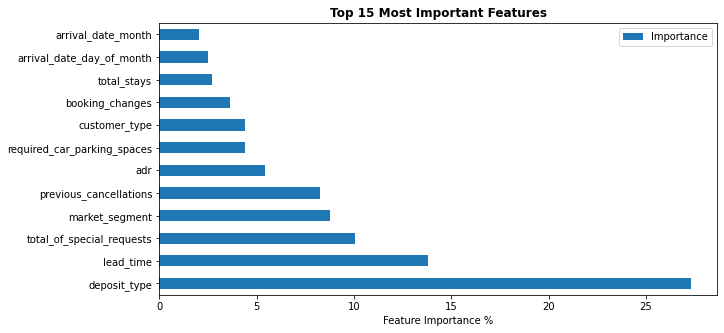

In [17]:
X = df1.drop(['is_canceled'], axis = 1)
y = df1['is_canceled']

from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X, y = sm.fit_resample(X, y)

#Train and test split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify = y,test_size = 0.30)

from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(max_depth = 15,min_samples_leaf= 1, min_samples_split = 2,n_estimators = 200)


plt.figure(figsize =(10,5))
rf_model.fit(X_train,y_train)
feature_imp = pd.Series(rf_model.feature_importances_*100 ,index = X.columns)
feature_imp.nlargest(12).plot(kind = 'barh',label = 'Importance')
plt.legend()
plt.title('Top 15 Most Important Features',weight = 'bold')
plt.xlabel('Feature Importance %')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118981 entries, 0 to 118980
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118981 non-null  int64  
 1   lead_time                       118981 non-null  int64  
 2   arrival_date_month              118981 non-null  object 
 3   arrival_date_day_of_month       118981 non-null  int64  
 4   meal                            118981 non-null  object 
 5   market_segment                  118981 non-null  object 
 6   distribution_channel            118981 non-null  object 
 7   is_repeated_guest               118981 non-null  int64  
 8   previous_cancellations          118981 non-null  int64  
 9   previous_bookings_not_canceled  118981 non-null  int64  
 10  reserved_room_type              118981 non-null  object 
 11  booking_changes                 118981 non-null  int64  
 12  deposit_type    

In [21]:
df= df.drop(['meal','kids','is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list','reserved_room_type','distribution_channel','guests'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118981 entries, 0 to 118980
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   is_canceled                  118981 non-null  int64  
 1   lead_time                    118981 non-null  int64  
 2   arrival_date_month           118981 non-null  object 
 3   arrival_date_day_of_month    118981 non-null  int64  
 4   market_segment               118981 non-null  object 
 5   previous_cancellations       118981 non-null  int64  
 6   booking_changes              118981 non-null  int64  
 7   deposit_type                 118981 non-null  object 
 8   customer_type                118981 non-null  object 
 9   adr                          118981 non-null  float64
 10  required_car_parking_spaces  118981 non-null  int64  
 11  total_of_special_requests    118981 non-null  int64  
 12  total_stays                  118981 non-null  int64  
dtyp

In [22]:
dummies = pd.get_dummies(df.arrival_date_month,prefix='arrival_date_month')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('arrival_date_month',axis='columns')

In [23]:
dummies = pd.get_dummies(df.market_segment,prefix='market_segment')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('market_segment',axis='columns')

In [ ]:
# dummies = pd.get_dummies(df.distribution_channel,prefix='distribution_channel')
# df = pd.concat([df,dummies],axis='columns')
# df = df.drop('distribution_channel',axis='columns')

In [ ]:
# dummies = pd.get_dummies(df.reserved_room_type,prefix='reserved_room_type')
# df = pd.concat([df,dummies],axis='columns')
# df = df.drop('reserved_room_type',axis='columns')

In [25]:
dummies = pd.get_dummies(df.deposit_type,prefix='deposit_type')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('deposit_type',axis='columns')

In [26]:
dummies = pd.get_dummies(df.customer_type,prefix='customer_type')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('customer_type',axis='columns')

In [27]:
df.head()

,is_canceled,lead_time,arrival_date_day_of_month,previous_cancellations,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_stays,arrival_date_month_April,...,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,1,0,3,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,1,0,4,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,1,0,0,75.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,1,0,0,75.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,1,0,0,98.0,0,1,2,0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
df.to_csv('hotel_cleaned_data_set_final_for_model.csv' ,index= False)
